In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
L = 1.5 # длина в м
R = 1.5 # радиус
E = 7e10  # модуль Юнга
ro = 2700  # плотоность алюминия
ro_air = 1.2  # на высоте 10км
nu = 0.33  # коэффицент Пуассона
G = E / (2 * (1 + nu))  # модуль сдвига
h = 0.0015   # тодщина пластины
D = (E * h ** 3) / (12 * (1 - nu ** 2))  # жесткость из уравнения колебания
beta = 0.01 # - коэф потерь
c = 330 # на высоте 10 км

In [16]:
df = pd.read_csv('Bies_TBL_Data_interpol.csv')
df = df.dropna()

In [17]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: str(x).replace(',', '.'))
    df[col] = df[col].astype(float)
    
#df = df.interpolate()
df['w'] = 2 * np.pi * df['Freq']

In [22]:
def f_ot_beta(Uph, lam1, lam2, w):
    k_q = w / Uph
    kappa_sq = w * np.sqrt(ro * h / D)
    bheta = (k_q ** 2) / kappa_sq
    a1 = 1 / (k_q * lam1)
    a2 = 1 / (k_q * lam2)
    a3 = bheta * (1 - a1 ** 2) - 1
    a4 = np.sqrt(a3 ** 2 + 4 * (a1 * bheta) ** 2)
    a5 = bheta * a2 ** 2 - a3
    a6 = np.sqrt(a5 ** 2 + 4 * (a1 * bheta) ** 2)
    
    # f = mult * [sl1 + num / den]
    
    mult = (np.sqrt(bheta) * a2) / (np.sqrt(2) * a4 * a6 ** 2)
    sl1 = a5 * np.sqrt(a4 - a3) - 2 * a1 * bheta * np.sqrt(a4 + a3)
    sl2 = (np.sqrt(2) * a1 * a4 * (a5 + 2 * bheta)) / a2 * np.sqrt(1 + bheta * a2 ** 2)
    return mult * (sl1 + sl2)

In [23]:
def phi(p_sq, Uph, lam1, lam2, w):
    phi_q = p_sq / (0.23 * w)
    eta = 0.01
    eta_n = 0.001
    coef = eta_n / eta
    return coef * phi_q * f_ot_beta(Uph, lam1, lam2, w) / (2 * ro * h * w)

In [24]:
def get_params(ind):
    return dict(df.iloc[ind])

In [34]:
f = np.array([phi(p_sq, Uph, lam1, lam2, w) for _, _, p_sq, Uph, lam1, lam2, w in (get_params(i).values() for i in range(len(df)))])

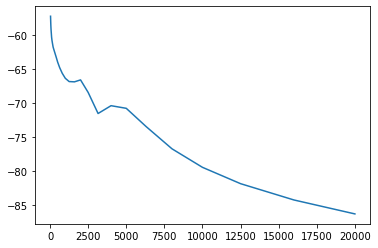

In [35]:
plt.plot(df['Freq'], 10 * np.log10(f))

In [29]:
# old

res = [2.2995411417750897e-09,
 1.2832909692820265e-08,
 5.249868207993587e-08,
 1.7653599624876037e-07,
 6.639301196218416e-07,
 5.196617083833144e-06,
 0.0007576256788260677,
 0.0014535698362557452,
 0.00043562178146617115,
 0.005375734828943285,
 0.010383134771195167,
 0.007653805741956096,
 0.13288720475553317,
 33.10057446533221,
 177.24607890032286,
 0.37649283283562857,
 0.01944777380302839,
 0.0009349488912019925,
 0.00024090313861118226,
 2.039301395343347e-05,
 9.028503453009288e-06,
 2.085103615144886e-06,
 1.0007251551121106e-06,
 1.7598137396103325e-07,
 3.8067809847423233e-08,
 3.052927572497267e-08,
 7.326596775273324e-10,
 2.405598773935805e-09,
 1.7848258305669626e-10]

In [37]:
res2 = [4.782353396435326e-21,
 8.891696460673227e-21,
 1.603828134348912e-20,
 1.1418804371714422e-19,
 1.5200680986043316e-20,
 2.0664492207377868e-20,
 3.5590592144119573e-20,
 3.517496984036756e-19,
 2.2132355961040478e-18,
 1.4793094162604588e-19,
 1.4834470863649854e-15,
 3.5319177608556444e-19,
 2.398869941721898e-18,
 2.719940428917298e-19,
 1.7736258753065555e-18,
 1.135752460517535e-21,
 2.1145806450120317e-22,
 3.0445705466786154e-23,
 5.055884461213984e-24,
 5.350675740665427e-25,
 5.766802814564839e-26,
 6.2785788398308956e-27,
 8.305112700963689e-28,
 1.0518065152173247e-28,
 1.2714031570613169e-29,
 1.7970489992438576e-30,
 2.6496427375687445e-31,
 3.1893464619881153e-32,
 4.936056233282772e-33]

In [149]:
res3 = [4.7797054585867696e-21,
 8.86507455984399e-21,
 1.6059837237741375e-20,
 1.135781197099636e-19,
 1.5201504320830774e-20,
 2.0750964301579413e-20,
 3.5495133576623374e-20,
 3.516127730188762e-19,
 2.201347877304846e-18,
 1.4857297022460227e-19,
 1.4872754689390016e-15,
 3.5105975621521577e-19,
 2.3888786087365877e-18,
 2.7479754175624167e-19,
 1.7809779147856033e-18,
 1.7177951010853916e-21,
 5.059842994670983e-21,
 5.730056037520041e-23,
 1.0779657310097463e-23,
 2.4507394405706173e-24,
 2.3496570124591387e-25,
 7.74820749551101e-26,
 2.44308150684669e-26,
 2.5795074539333424e-25,
 5.142123918053579e-25,
 1.0542266684678016e-26,
 1.698705346899642e-27,
 4.3695253252563696e-27,
 4.723230858034862e-32]


In [38]:
import plotly.express as px

In [159]:
fig = px.line(x=df['Freq'], y=10 * np.log10(f))
fig.add_scatter(x=df['Freq'], y=10* np.log10(np.array(res3) / (4e-10)))

In [52]:
another = [2.2676723620570310795677e-18,
            6.5585203203187020840168e-18,
            1.1725204528455823728327e-17,
            2.3655910976992490019933e-17,
            2.7478442040650403022071e-17,]

In [50]:
another

[2.267672362057031e-18,
 6.558520320318702e-18,
 1.1725204528455824e-17,
 2.365591097699249e-17,
 2.7478442040650404e-17]

In [111]:
fig = px.line(x=df['Freq'][:5], y=10 * np.log10(f * 0.1)[:5])
fig.add_scatter(x=df['Freq'][:5], y=10* np.log10(0.6 * df['w'][:5] * np.array(another) / (4e-10)))

# Закон массы

In [160]:
tmp = np.array(res3) / (4 * 10 ** (-10))

In [161]:
p1 = df['P^2']

In [162]:
p2 = tmp * ro_air * c

In [163]:
10 * np.log10(p1 / p2)

0      91.067190
2      89.487770
4      87.808949
6      80.318555
8      90.156028
12     89.683599
15     88.362130
17     79.510606
19     72.437395
22     85.145701
25     46.137288
28     83.409387
31     75.983736
33     86.372340
35     79.268925
37    110.222465
39    106.326662
41    126.678099
43    134.645202
45    141.677359
47    152.450836
49    157.769762
51    163.188574
53    153.347671
55    150.749776
57    168.035989
59    176.261164
61    172.560251
63    222.423477
Name: P^2, dtype: float64

In [164]:
10 * np.log10(1 + ((df['w'] * ro * h) / (2 * ro_air * c)) ** 2)

0      3.062816
2      4.235295
4      5.539837
6      7.073424
8      8.812091
12    10.539738
15    12.337621
17    14.381894
19    16.262714
22    18.163789
25    20.146598
28    22.205608
31    24.134389
33    26.135592
35    28.206562
37    30.142399
39    32.079086
41    34.222237
43    36.159846
45    38.097667
47    40.104829
49    42.179657
51    44.117763
53    46.125111
55    48.200060
57    50.138236
59    52.076421
61    54.220610
63    56.158805
Name: w, dtype: float64

In [132]:
10 * np.log10(df['P^2'] / (f * 400))

0     39.055502
2     40.769778
4     42.349366
6     43.960275
8     45.602968
12    47.112276
15    48.586126
17    50.171487
19    51.576114
22    52.958359
25    54.427109
28    56.043292
31    57.701748
33    59.495016
35    61.342067
37    62.867968
39    64.143669
41    65.076182
43    65.503366
45    67.944043
47    71.622388
49    70.976247
51    71.769592
53    74.836962
55    78.502790
57    81.623662
59    84.317955
61    87.109896
63    89.356661
Name: P^2, dtype: float64